# IMPORTAÇÃO DAS BIBLIOTECAS PRINCIPAIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LEITURA DOS DATASETS

In [2]:
# LEITURA DOS ARQUIVOS DA BASE DE DADOS, CRIANDO DATAFRAMES
jogos_df = pd.read_csv(r'/content/sample_data/vw_completo_raio_x2.csv', sep = ',', encoding='utf-8')

clubes_df = pd.read_csv(r'/content/sample_data/vw_dim_clube_adversario.csv', sep = ',', encoding='utf-8')

# PREPARAÇÃO DA BASE DE DADOS

In [3]:
#vamos renomear o campo sk_clube para poder fazer o merge
clubes_df = clubes_df.rename(columns = {'SK_CLUBE': 'SK_CLUBE_ADVERSARIO'})

#juntando os dataframes em um novo e já renomeando alguns campos para ficar mais claro o significado
dw_brasileirao_df = jogos_df.merge(clubes_df, on = 'SK_CLUBE_ADVERSARIO').rename(
    columns={'CIDADE': 'CIDADE_ADVERSARIO', 'ESTADO': 'ESTADO_ADVERSARIO',
             'SIGLA_ESTADO': 'SIGLA_ESTADO_ADVERSARIO', 'REGIAO': 'REGIAO_ADVERSARIO'})


In [4]:
# CONTINUAÇÃO DA PREPARAÇÃO DA BASE DE DADOS

#acrescentando o campo calculado RESULTADO, baseado nos valores dos campos EMPATES, VITORIAS E EMPATES
dw_brasileirao_df['RESULTADO'] = np.where(dw_brasileirao_df.VITORIAS == 1 , 'VITORIA', 
                                          np.where(dw_brasileirao_df.DERROTAS == 1 , 'DERROTA', 'EMPATE'))

#em nosso trabalho, vamos realizar análise referente ao desempnho do clube FLAMENGO
#então vamos filtar a base de acordo com esse critério, e também vamos eliminar as linhas
#que não têm a informação do esquema tático
dw_brasileirao_df = dw_brasileirao_df[(dw_brasileirao_df['CLUBE'] == 'FLAMENGO') &
                                      (dw_brasileirao_df['ESQUEMA_TATICO'] != 'SEM INFORMAÇÃO')]

#mantendo apenas as colunas que queremos
brasileirao = dw_brasileirao_df[['ESQUEMA_TATICO', 'REGIAO_ADVERSARIO',
                                       'TURNO_DIA', 'CONDICAO', 'RESULTADO']]

#Após tratamento da base, vamos resetar os índices para ficarem contíguos
brasileirao.reset_index(inplace=True, drop=True)

# Visualizando o dataframe

In [5]:
brasileirao

,ESQUEMA_TATICO,REGIAO_ADVERSARIO,TURNO_DIA,CONDICAO,RESULTADO
0,4-2-3-1,SUDESTE,TARDE,VISITANTE,DERROTA
1,4-2-3-1,SUDESTE,TARDE,MANDANTE,DERROTA
2,4-2-3-1,SUDESTE,MANHÃ,MANDANTE,VITORIA
3,4-2-3-1,SUDESTE,TARDE,VISITANTE,EMPATE
4,4-2-3-1,SUDESTE,TARDE,VISITANTE,DERROTA
...,...,...,...,...,...
263,4-4-2,SUDESTE,NOITE,VISITANTE,EMPATE
264,4-2-3-1,SUDESTE,NOITE,MANDANTE,DERROTA
265,4-2-3-1,SUDESTE,NOITE,VISITANTE,EMPATE
266,4-4-2,CENTRO-OESTE,NOITE,VISITANTE,VITORIA


In [6]:
brasileirao.describe()

,ESQUEMA_TATICO,REGIAO_ADVERSARIO,TURNO_DIA,CONDICAO,RESULTADO
count,268,268,268,268,268
unique,9,4,3,2,3
top,4-2-3-1,SUDESTE,NOITE,VISITANTE,VITORIA
freq,185,130,135,135,141


In [7]:
# pegando os valores possíveis do campo RESULTADO, que será nosso atributo alvo
# será usado mais tarde na visualização da árvore
class_names = list(brasileirao.RESULTADO.unique())
class_names

['DERROTA', 'VITORIA', 'EMPATE']

In [8]:
brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ESQUEMA_TATICO     268 non-null    object
 1   REGIAO_ADVERSARIO  268 non-null    object
 2   TURNO_DIA          268 non-null    object
 3   CONDICAO           268 non-null    object
 4   RESULTADO          268 non-null    object
dtypes: object(5)
memory usage: 10.6+ KB


# APLICANDO O LABEL ENCONDER

In [11]:
from sklearn.preprocessing import LabelEncoder

#Atribuição apenas para manter os valores do DF brasileirao
#Vamos usar outro DF com os dados codificados
brasileirao_enc = brasileirao

# APLICANDO O LABEL ENCONDER PARA CODIFICAÇÃO DOS ATRIBUTOS CATEGÓRICOS PARA NUMÉRICOS, PARA PODER APLICAR O ALGORITMO DE CLASSIFICAÇÃO
le = LabelEncoder()

colunas = brasileirao_enc.dtypes.reset_index()

categ_cols = colunas[colunas[0] == 'object']['index'].to_list()

# Aplicando o encode
for i in categ_cols:
    brasileirao_enc[str(i) +'_encoded'] = le.fit_transform(brasileirao_enc[i])
    brasileirao_enc = brasileirao_enc.drop(i,axis = 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [12]:
brasileirao_enc

,ESQUEMA_TATICO_encoded,REGIAO_ADVERSARIO_encoded,TURNO_DIA_encoded,CONDICAO_encoded,RESULTADO_encoded
0,5,2,2,1,0
1,5,2,2,0,0
2,5,2,0,0,2
3,5,2,2,1,1
4,5,2,2,1,0
...,...,...,...,...,...
263,8,2,1,1,1
264,5,2,1,0,0
265,5,2,1,1,1
266,8,0,1,1,2


# PARTICIONANDO A BASE DE DADOS (TREINO E TESTE)

In [13]:
from sklearn.model_selection import train_test_split

x = brasileirao_enc.drop('RESULTADO_encoded', axis = 1)
y = brasileirao_enc['RESULTADO_encoded']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=42)


# CARREGANDO E TREINANDO O MODELO

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

brasileirao_tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=20, criterion='gini')

brasileirao_tree = brasileirao_tree.fit(x_train, y_train)

y_pred_train = brasileirao_tree.predict(x_train)
y_pred_test = brasileirao_tree.predict(x_test)


# VERIFICANDO OS RESULTADOS DO TREINO E TESTE

In [17]:
print("Acurácia de treinamento:")
print(accuracy_score(y_train,y_pred_train))
print("")
print("Acurácia de teste:")
print(accuracy_score(y_test,y_pred_test))

Acurácia de treinamento:
0.5970149253731343

Acurácia de teste:
0.5074626865671642


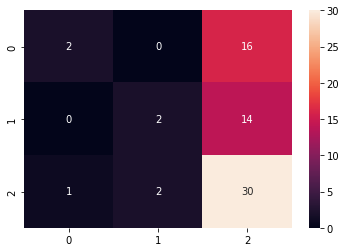

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True)

In [19]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, 
                         columns=['DERROTA (Prev)', 'VITORIA (Prev)', 'EMPATE (Prev)'])
print(cnf_table)

         DERROTA (Prev)  VITORIA (Prev)  EMPATE (Prev)
DERROTA               2               0             16
VITORIA               0               2             14
EMPATE                1               2             30


# TESTANDO VARIAÇÕES NOS PARÂMETROS DA ÁRVORE

In [23]:
#Variando os parâmetros da árvore

depth = [5, 10, 10, 50, 100]
leaf = [5, 10, 20, 50, 100]

for i,j in zip(depth, leaf):

    print('Depth = ', i)
    print('Leaf = ', j)
    brasileirao_tree = DecisionTreeClassifier(max_depth=i, max_leaf_nodes=j, random_state=42)
    brasileirao_tree.fit(x_train, y_train)
    y_pred_train = brasileirao_tree.predict(x_train)
    y_pred_test = brasileirao_tree.predict(x_test)

    print('Score de Treino é :',accuracy_score(y_train,y_pred_train))
    print('Score de Teste é :',accuracy_score(y_test,y_pred_test))
    print('')

Depth =  5
Leaf =  5
Score de Treino é : 0.5671641791044776
Score de Teste é : 0.5074626865671642

Depth =  10
Leaf =  10
Score de Treino é : 0.582089552238806
Score de Teste é : 0.5373134328358209

Depth =  10
Leaf =  20
Score de Treino é : 0.5970149253731343
Score de Teste é : 0.5074626865671642

Depth =  50
Leaf =  50
Score de Treino é : 0.6318407960199005
Score de Teste é : 0.44776119402985076

Depth =  100
Leaf =  100
Score de Treino é : 0.6318407960199005
Score de Teste é : 0.44776119402985076



# VISUALIZANDO OS VALORES POSSÍVEIS DOS ATRIBUTOS

In [24]:
# Visualizando os valores categóricos originais possíveis dos atributos, apenas para comparação na árvore,
# Pois esta mostra os valores numéricos codificados
condicao_values = list(brasileirao.CONDICAO.unique())
print('CONDICAO: ')
print(condicao_values)
print('')
turno_values = list(brasileirao.TURNO_DIA.unique())
print('TURNO_DIA: ')
print(turno_values)
print('')
esquema_values = list(brasileirao.ESQUEMA_TATICO.unique())
print('ESQUEMA_TATICO: ')
print(esquema_values)
print('')
regiao_values = list(brasileirao.REGIAO_ADVERSARIO.unique())
print('REGIAO_ADVERSARIO: ')
print(regiao_values)
print('')
print('RESULTADO: ')
print(class_names)
print('')

CONDICAO: 
['VISITANTE', 'MANDANTE']

TURNO_DIA: 
['TARDE', 'MANHÃ', 'NOITE']

ESQUEMA_TATICO: 
['4-2-3-1', '4-1-4-1', '4-1-2-1-2', '4-4-2', '4-2-2-2', '4-3-3', '4-1-3-2', '4-3-2-1', '3-4-2-1']

REGIAO_ADVERSARIO: 
['SUDESTE', 'NORDESTE', 'SUL', 'CENTRO-OESTE']

RESULTADO: 
['DERROTA', 'VITORIA', 'EMPATE']



# EXIBIÇÃO DA ÁRVORE DE DECISÃO

Score de Treino é : 0.582089552238806
Score de Teste é : 0.5373134328358209


[Text(0.4230769230769231, 0.9166666666666666, 'CONDICAO_encoded <= 0.5\ngini = 0.603\nsamples = 201\nvalue = [52, 41, 108]\nclass = EMPATE'),
 Text(0.15384615384615385, 0.75, 'ESQUEMA_TATICO_encoded <= 4.5\ngini = 0.533\nsamples = 100\nvalue = [21, 16, 63]\nclass = EMPATE'),
 Text(0.07692307692307693, 0.5833333333333334, 'gini = 0.32\nsamples = 15\nvalue = [3, 0, 12]\nclass = EMPATE'),
 Text(0.23076923076923078, 0.5833333333333334, 'ESQUEMA_TATICO_encoded <= 6.0\ngini = 0.56\nsamples = 85\nvalue = [18, 16, 51]\nclass = EMPATE'),
 Text(0.15384615384615385, 0.4166666666666667, 'gini = 0.546\nsamples = 65\nvalue = [11, 14, 40]\nclass = EMPATE'),
 Text(0.3076923076923077, 0.4166666666666667, 'TURNO_DIA_encoded <= 0.5\ngini = 0.565\nsamples = 20\nvalue = [7, 2, 11]\nclass = EMPATE'),
 Text(0.23076923076923078, 0.25, 'REGIAO_ADVERSARIO_encoded <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]\nclass = DERROTA'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue

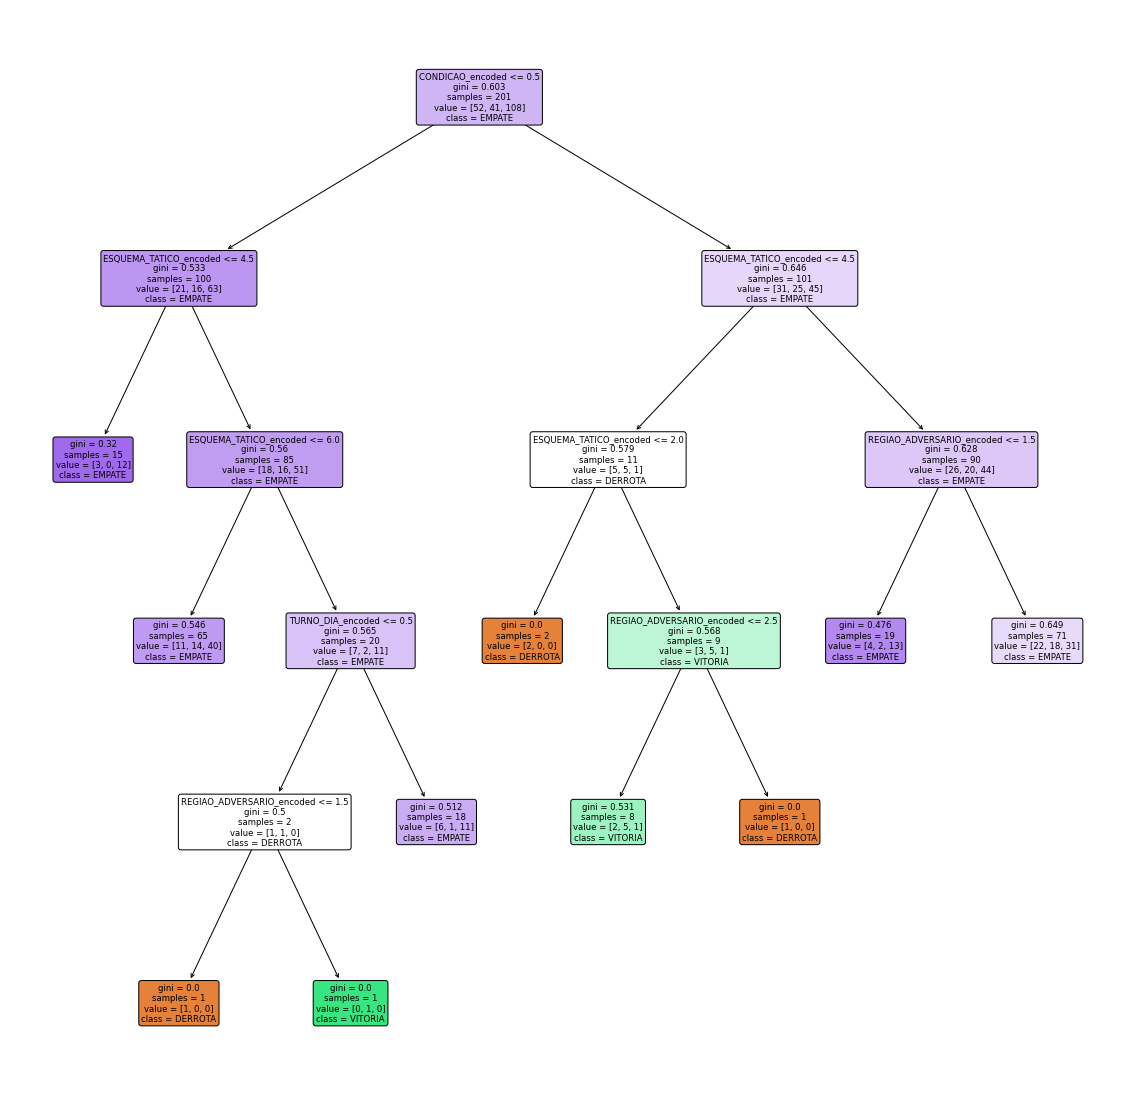

In [26]:
# Exibição da Árvore de Decisão

from sklearn.tree import plot_tree

brasileirao_tree = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=10, random_state=42)
brasileirao_tree.fit(x_train, y_train)
y_pred_train = brasileirao_tree.predict(x_train)
y_pred_test = brasileirao_tree.predict(x_test)

print('Score de Treino é :',accuracy_score(y_train,y_pred_train))
print('Score de Teste é :',accuracy_score(y_test,y_pred_test))

plt.figure(figsize=(20,20))

plot_tree(brasileirao_tree, feature_names = x.columns, rounded = True, filled=True, class_names =  class_names)